In [1]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
import nltk
import re
from nltk.corpus import stopwords

from nltk.util import ngrams

# Visualization     
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# do not print warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("job_offers_original_2.csv")

In [3]:
#drop all columns and keeps only job_title and job_description
df = df[['job_title','company_name', 'job_description']]

In [4]:
#(?<![A-Z\W])  what precedes is a word character EXCEPT for capital letters
#(?=[A-Z])     and what follows is a capital letter
def sepa(text): 
    text = re.sub(r'(?<![A-Z\W])(?=[A-Z])', ' ', text)
    return(text)

df['job_description']=df['job_description'].apply(sepa)

In [5]:
#separate word and number
def sepa2(text): 
    text = re.sub(r'(?<=\d)(?=[^\d\s])|(?<=[^\d\s])(?=\d)', ' ', text, 0)
    return(text)

df['job_description']=df['job_description'].apply(sepa2)

In [5]:
df['job_description'] = df['job_description'].str.replace('[^\w\s]', ' ') # remove punctuation 
df["job_description"] = df["job_description"].str.lower() #lowercase 
df['job_description'] = df['job_description'].str.replace('\d+', '') # remove digits

In [4]:
df['job_description'][0]

"Do you want to work on the most pressing problem of our generation?We're building the infrastructure for the net zero transition, and we're looking for brilliant engineers, designers, and data scientists who want to help define a low carbon future.Decarbonizing the economy requires a granular, real-time view of where emissions come from and how they might be reduced. We build software to automate the carbon footprinting of supply chains. Banks, traders, and manufacturers use our product to tame the complexity of international supply networks, identify the most carbon-intensive parts, and find greener alternatives. We were part of the Y Combinator Summer 2020 batch and have secured backing from the UK government's innovation arm, InnovateUK, the NatWest accelerator and the London Business School Incubator.To join Carbon Chain, you'll be a keen technologist who loves to learn from others. Our company is made up of 10 passionate people with expertise ranging from oil refining to deep lea

In [6]:
# import stop words
stop_words=nltk.corpus.stopwords.words('english')
# add more words to remove
remove_key_w = ['show','le','please','feel','free','opportunity'
               ,'company','paid','bonus','applicant','candidate','application','interview','day','annual','leave',
               'plus','holiday']

def clean_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    cleaned_text= [t for t in tokens if t not in remove_key_w]
    cleaned_docs= " ".join(cleaned_text)
    return cleaned_docs

df['desc_tokenized']=df['job_description'].apply(clean_text)

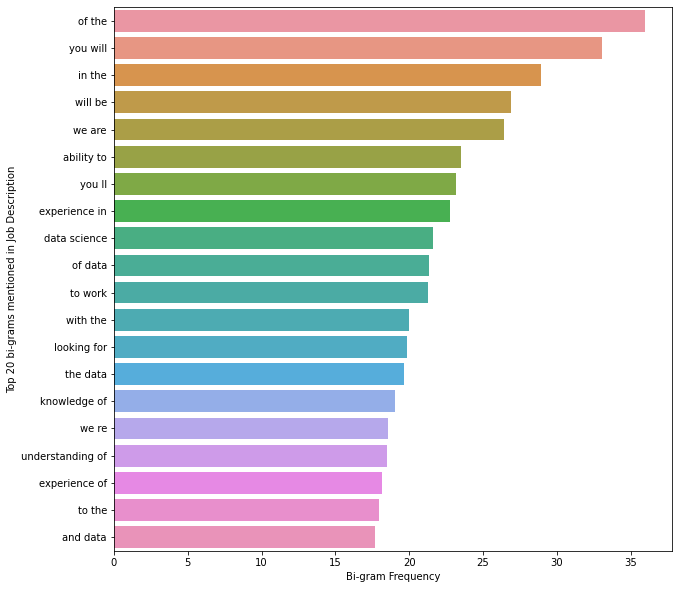

In [10]:
#Bi-grams 

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = TfidfVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Bi-gram Frequency")
    plt.ylabel("Top 20 bi-grams mentioned in Job Description")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(df['job_description'],2)

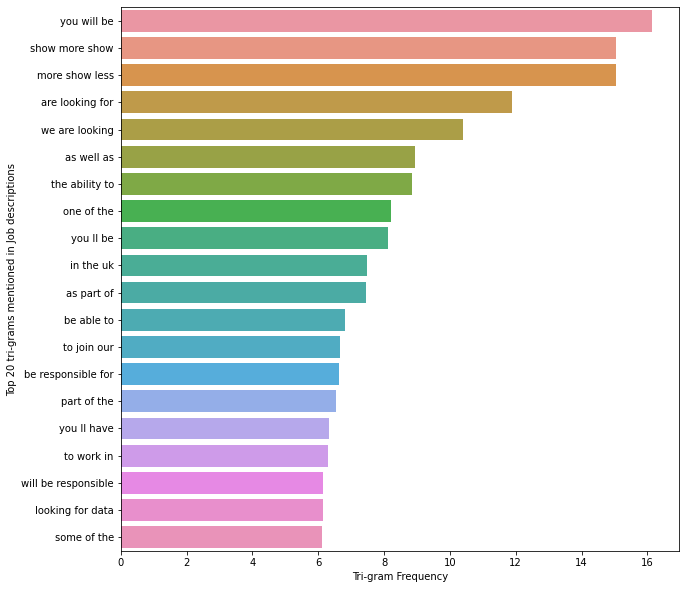

In [14]:
#Tri-grams 

def plot_top_ngrams_barchart(text, n=3):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = TfidfVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Tri-gram Frequency")
    plt.ylabel("Top 20 tri-grams mentioned in Job descriptions")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(df['job_description'],3)


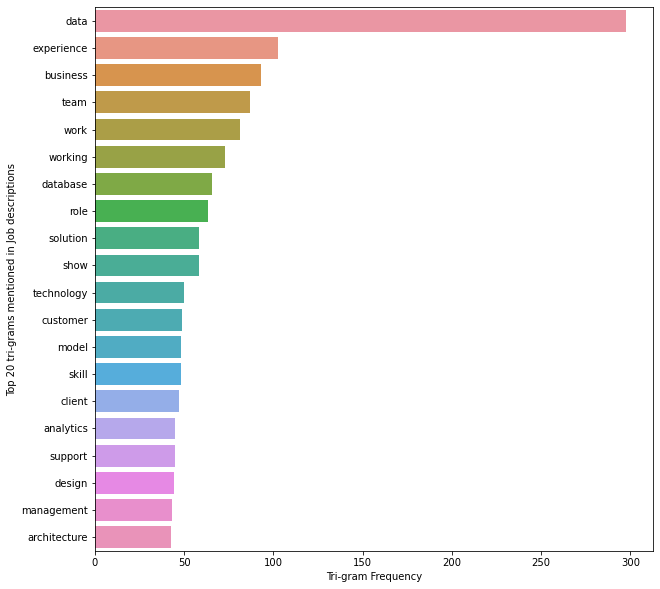

In [17]:
#Uni-grams 

def plot_top_ngrams_barchart(text, n=1):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = TfidfVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Tri-gram Frequency")
    plt.ylabel("Top 20 tri-grams mentioned in Job descriptions")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(df['desc_tokenized'],1)


In [7]:
#some common words that lead to the skills are experience, you'll have, responsible, are looking for, ability to,
#knowledge of, understanding of
import re
import pandas as pd
import spacy
from spacy.util import filter_spans
from spacy.tokens import Span
from spacy.matcher import Matcher

In [19]:
!pip install spacy

     |████████████████████████████████| 6.5 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 457 kB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 752 kB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 8.1 MB/s eta 0:00:011
     |████████████████████████████████| 5.3 MB 7.2 MB/s eta 0:00:01
  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.1.0
    Uninstalling smart-open-6.1.0:
      Successfully uninstalled smart-open-6.1.0


In [8]:
from spacy import displacy
from IPython.display import HTML, display

In [9]:
#Extract the ads into a list
desc=list(df.job_description)

In [26]:
!python -m spacy download en_core_web_sm


     |████████████████████████████████| 12.8 MB 9.8 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
#Initialise Spacy model
import en_core_web_sm
nlp = en_core_web_sm.load()

# Extracting from job ads

In [11]:
def highlight_terms(terms, texts):
    for doc in nlp.pipe(texts):
        for sentence in set([tok.sent for tok in doc if tok.lower_ in terms]):
            text = sentence.text.strip() # break docs into sentence
            markup = re.sub(fr'(?i)\b({"|".join(terms)})\b', r'<strong>\1</strong>', text)
            display(HTML(markup))
            print('-----')

In [12]:
highlight_terms(['experience'], desc[:10])

-----


-----


-----


-----


-----


-----


-----


-----


-----


-----


-----


-----


In [13]:
matcher = Matcher(nlp.vocab)
pattern = [{'POS': 'NOUN', 'OP': '+'}, {'LOWER': 'experience'}]
matcher.add('experience_noun', [pattern])

pattern = [{'LOWER': 'experience'}, {'POS': 'ADP'}, {'POS': {'IN': ('DET', 'NOUN', 'PROPN')}, 'OP': '+'}]
matcher.add('experience_adp', [pattern])

In [14]:
def show_extraction(examples, *extractors):
    seen = set()
    for doc in nlp.pipe(examples):
        doc.ents = filter_spans([Span(doc, start, end, label) for extractor in extractors for label, start, end in extractor(doc)])
        for tok in doc:
            if tok.lower_ == 'experience':
                sentence = tok.sent
                if sentence.text in seen:
                    continue
                seen.update([sentence.text])
                if not sentence.ents:
                    doc.ents = list(doc.ents) + [Span(doc, tok.i, tok.i+1, 'MISSING')]
                displacy.render(sentence, style='ent', options = {'colors': {'MISSING': 'pink',
                                                                            'EXPERIENCE': 'lightgreen'}})
                

In [15]:
show_extraction(desc[:10], matcher)

In [16]:
def get_extractions(examples, *extractors):
    # Could use context instead of enumerate
    for idx, doc in enumerate(nlp.pipe(examples, batch_size=100, disable=['ner'])):
        for ent in filter_spans([Span(doc, start, end, label) for extractor in extractors for label, start, end in extractor(doc)]):
            sent = ent.root.sent
            yield ent.text, idx, ent.start, ent.end, ent.label_, sent.start, sent.end

In [17]:
list(get_extractions(desc[:10], matcher))

[('software engineering experience', 0, 519, 522, 'experience_noun', 322, 641),
 ('software engineering experience', 0, 760, 763, 'experience_noun', 641, 955),
 ('data platform experience', 1, 307, 310, 'experience_noun', 245, 471),
 ('hadoop ecosystem experience', 1, 361, 364, 'experience_noun', 245, 471),
 ('data platform experience', 2, 212, 215, 'experience_noun', 150, 376),
 ('hadoop ecosystem experience', 2, 266, 269, 'experience_noun', 150, 376),
 ('experience at the data shed', 3, 213, 218, 'experience_adp', 1, 258),
 ('experience in the', 3, 222, 225, 'experience_adp', 1, 258),
 ('data pipelines experience', 3, 365, 368, 'experience_noun', 314, 649),
 ('data analysis experience', 3, 370, 373, 'experience_noun', 314, 649),
 ('quality code documentation experience',
  4,
  586,
  590,
  'experience_noun',
  1,
  808),
 ('experience with programming', 5, 495, 498, 'experience_adp', 163, 848),
 ('party tech vendors experience', 5, 689, 693, 'experience_noun', 163, 848),
 ('experie

In [18]:
#Put it in a dataframe and join with the job metadata
def extract_df(*extractors, n_max=None, **kwargs):
    if n_max is None:
        n_max = len(df)
    ent_df = pd.DataFrame(list(get_extractions(df[:n_max].job_description, *extractors)),
                          columns=['text', 'docidx', 'start', 'end', 'label', 'sent_start', 'sent_end'])
    return ent_df.merge(df, how='left', left_on='docidx', right_index=True)

In [19]:
%time 
ent_df = extract_df(matcher, n_max=1000)
ent_df.head()

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 20.3 µs


,text,docidx,start,end,label,sent_start,sent_end,job_title,company_name,job_description,desc_tokenized
0,software engineering experience,0,519,522,experience_noun,322,641,Data Engineer,CarbonChain,do you want to work on the most pressing prob...,want work pressing problem generation building...
1,software engineering experience,0,760,763,experience_noun,641,955,Data Engineer,CarbonChain,do you want to work on the most pressing prob...,want work pressing problem generation building...
2,data platform experience,1,307,310,experience_noun,245,471,Data Engineer,Bumble,we strongly encourage people of colour lesbi...,strongly encourage people colour lesbian bisex...
3,hadoop ecosystem experience,1,361,364,experience_noun,245,471,Data Engineer,Bumble,we strongly encourage people of colour lesbi...,strongly encourage people colour lesbian bisex...
4,data platform experience,2,212,215,experience_noun,150,376,Data Engineer,Bumble,we strongly encourage people of colour lesbi...,strongly encourage people colour lesbian bisex...


In [21]:
#Aggregate the counts of different texts.

#It's more significant if it happens accross multiple Advertisers/Sources.

def aggregate_df(df, col=['text']):
    return (df
            .groupby(col)
            .agg(n_company=('company_name', 'nunique'),
                 n=('job_title', 'count'))
            .reset_index()
            .sort_values(['n_company','n'], ascending=False)
        )

In [22]:
aggregate_df(ent_df).head(10)

,text,n_company,n
149,experience in a,14,71
58,customer experience,11,32
506,skills experience,11,32
66,data experience,10,33
559,work experience,9,22
551,user experience,8,17
142,experience experience,6,27
422,industry experience,6,8
189,experience in data architecture,4,25
381,experience with python,4,19


In [23]:
def showent(docidx, start, end, label, sent_start, sent_end, **kwargs):
    # We don't need to parse it, so just make_doc
    doc = nlp.make_doc(desc[docidx])
    doc.ents = [Span(doc, start, end, label)]
    sent = doc[sent_start:sent_end]
    displacy.render(sent, style='ent')
    
def showent_df(df):
    for idx, row in df.iterrows():
        showent(**row)

In [24]:
showent_df(ent_df.query('text == "experience in a"').head())

**Extracting types of experience**

In [25]:
def extract_noun_phrase_experience(doc):
    for np in doc.noun_chunks:
        if np[-1].lower_ == 'experience':
            if len(np) > 1:
                yield 'EXPERIENCE', np[0].i, np[-1].i

In [26]:
show_extraction(desc[:10], extract_noun_phrase_experience)

In [27]:
%time 
ent_df = extract_df(extract_noun_phrase_experience, n_max=50000)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 13.1 µs


In [28]:
aggregate_df(ent_df).head(50)

,text,n_company,n
570,previous,30,149
718,strong,17,58
860,your,15,60
622,relevant,12,34
593,proven,9,49
855,years,8,34
273,demonstrable,7,45
319,equivalent,7,25
361,extensive,7,10
832,user,7,9


In [29]:
showent_df(ent_df.query("text=='your'").head(10))

In [34]:
experience_qualifiers = ['previous', 'strong', 'your','relevant','proven','years','demonstrable','equivalent','extensive'
                         ,'following', 'the','prior','practical','desirable','the','some','working','significant',
                         'other','advanced', 'solid', 'professional', 'any', 'similar','required','a plus','work','essential','etc'
                         ,'experience', 'knowledge','good'
                        ]

stopwords = nltk.corpus.stopwords.words('english')

experience_qualifier_pattern = rf'\b(?:{"|".join(experience_qualifiers)})\b'

experience_qualifier_pattern

'\\b(?:previous|strong|your|relevant|proven|years|demonstrable|equivalent|extensive|following|the|prior|practical|desirable|the|some|working|significant|other|advanced|solid|professional|any|similar|required|a plus|work|essential|etc|experience|knowledge|good)\\b'

In [35]:
aggregate_df(ent_df[(~ent_df.text.str.lower().str.contains(experience_qualifier_pattern)) & # Not a qualifier
                     ~ent_df.text.isin(stopwords)]).head(50)

,text,n_company,n
515,user,7,9
166,customer,5,8
170,data,4,19
407,python,4,12
449,software engineering,3,39
248,excel,3,16
116,both written and oral,3,12
216,detail,3,8
294,industry,3,5
61,airflow,3,4


# Extracting experience in a field

In [36]:
def extract_adp_experience(doc, label='EXPERIENCE'):
    for tok in doc:
        if tok.lower_ == 'experience':
            for child in tok.rights:
                if child.dep_ == 'prep':
                    for obj in child.children:
                        if obj.dep_ == 'pobj':
                            yield label, obj.left_edge.i, obj.i+1

In [92]:
show_extraction(desc[:10], extract_adp_experience)

In [38]:
def extract_adp_experience_2(doc):
    for np in doc.noun_chunks:
        start_tok = np[0].i
        if start_tok >= 2 and doc[start_tok - 2].lower_ == 'experience' and doc[start_tok - 1].pos_ == 'ADP':
            yield 'EXPERIENCE', start_tok, start_tok + len(np)

In [39]:
show_extraction(desc[:10], extract_adp_experience_2)

In [40]:
%time ent_adp_df = extract_df(extract_adp_experience, n_max=50)

CPU times: user 1.96 s, sys: 221 ms, total: 2.18 s
Wall time: 2.32 s


In [41]:
%time ent_adp_df = extract_df(extract_adp_experience_2, n_max=50)

CPU times: user 1.9 s, sys: 181 ms, total: 2.08 s
Wall time: 2.1 s


In [42]:
%time ent_adp_df = extract_df(extract_adp_experience, n_max=50000)

CPU times: user 57.7 s, sys: 3.56 s, total: 1min 1s
Wall time: 1min 2s


In [43]:
aggregate_df(ent_adp_df).head(50)

,text,n_company,n
521,sql,7,17
467,python,5,56
442,performance tuning,4,13
140,building,4,11
90,any,4,5
275,design,3,31
123,backups restores,3,20
204,data architecture,3,18
321,experience,3,18
29,a range,3,15


In [44]:
def highlight_text_context(terms, texts, n_before=1, n_after=2):
    context = []
    for doc in nlp.pipe(texts):
        sentences = list(doc.sents)
        idxs = [i for i, sent in enumerate(sentences) if any(term in sent.text.lower() for term in terms)]
        
        for idx in idxs:
            before = ''.join(sent.text for sent in sentences[max(idx-n_before, 0):idx])
            after = ''.join(sent.text for sent in sentences[idx+1:min(idx+n_before+1, len(sentences))])
            text = sentences[idx].text
            markup = re.sub(fr'(?i)\b({"|".join(terms)})\b', r'<strong>\1</strong>',
                                 f'<span style="color:blue">{text}</span>')
            display(HTML(before + markup + after))

In [45]:
terms = ['experience']

for _, q in ent_adp_df.query("text=='a'").head(7).iterrows():
    doc = nlp(q.FullDescription)
    if q.sent_start > 0:
        prev_sent = doc[q.sent_start - 1].sent.text
    else:
        prev_sent = ''
    
    if q.sent_end < len(doc):
        next_sent = doc[q.sent_end].sent.text
    else:
        next_sent = ''
        
    text = doc[q.sent_start:q.sent_end].text
    markup = re.sub(fr'(?i)\b({"|".join(terms)})\b', r'<strong>\1</strong>',
                     f'<span style="color:blue">{text}</span>')
    display(HTML(prev_sent + markup + next_sent))

In [46]:
def get_left_span(tok, label='', include=True):
    offset = 1 if include else 0
    idx = tok.i
    while idx > tok.left_edge.i:
        if tok.doc[idx - 1].pos_ in ('NOUN', 'PROPN', 'ADJ', 'X'):
            idx -= 1
        else:
            break
    return label, idx, tok.i+offset

In [47]:
def get_conjugations(tok):
    new = [tok]
    while new:
        tok = new.pop()
        yield tok
        for child in tok.children:
            if child.dep_ == 'conj':
                new.append(child)

In [48]:
#old
EXP_TERMS = ['experience']
def extract_adp_conj_experience(doc, label='EXPERIENCE'):
    for tok in doc:
        if tok.lower_ in EXP_TERMS:
            for child in tok.rights:
                if child.dep_ == 'prep':
                    for obj in child.children:
                        if obj.dep_ == 'pobj':
                            for conj in get_conjugations(obj):
                                yield get_left_span(conj, label)


In [49]:
show_extraction(desc[:10], extract_adp_conj_experience)

# Extracting Verbs followed by Adposition



In [50]:
def extract_verb_maybeadj_noun_experience(doc, label='EXPERIENCE'):
    for tok in doc:
        if tok.lower_ in EXP_TERMS:
            for child in tok.rights:
                if child.dep_ == 'acl':
                    for gc in child.children:
                        if gc.dep_ == 'prep':
                            for ggc in gc.children:
                                if ggc.dep_ == 'pobj':
                                    for c in get_conjugations(ggc):
                                        yield get_left_span(c, 'EXPERIENCE')
                        elif gc.dep_ == 'dobj':
                            for c in get_conjugations(gc):
                                yield get_left_span(c, 'EXPERIENCE')

In [51]:
show_extraction(desc[:10], extract_verb_maybeadj_noun_experience)

# Extracting types of experience accross all job ads

In [52]:
extract_exps = [extract_adp_conj_experience,]

In [53]:
n_desc = len(df)

In [54]:
%%time
df_ents = extract_df(*extract_exps, n_max=n_desc)

CPU times: user 57.5 s, sys: 3.27 s, total: 1min
Wall time: 1min 1s


In [55]:
df_ents.to_csv('experience_adp_ents.csv', index=False)

In [57]:
df_ents = pd.read_csv('experience_adp_ents.csv', low_memory=False)

In [58]:
df_ents

,text,docidx,start,end,label,sent_start,sent_end,job_title,company_name,job_description,desc_tokenized
0,data,3,216,217,EXPERIENCE,1,258,Data Engineer,The Data Shed,description at the data shed we ve been work...,description data shed working truly inspiring ...
1,things,3,226,227,EXPERIENCE,1,258,Data Engineer,The Data Shed,description at the data shed we ve been work...,description data shed working truly inspiring ...
2,exploratory data analysis experience,3,369,373,EXPERIENCE,314,649,Data Engineer,The Data Shed,description at the data shed we ve been work...,description data shed working truly inspiring ...
3,programming,5,497,498,EXPERIENCE,163,848,Data Engineer,Essence,data engineer business intelligenceat essenc...,data engineer business intelligenceat essence ...
4,statistical languages,5,500,502,EXPERIENCE,163,848,Data Engineer,Essence,data engineer business intelligenceat essenc...,data engineer business intelligenceat essence ...
...,...,...,...,...,...,...,...,...,...,...,...
3271,database administrator,1768,523,525,EXPERIENCE,263,623,PL/SQL Developer,Gattaca,job title database and wh administrator loca...,title database administrator location durringt...
3272,current rdbms technologies,1768,530,533,EXPERIENCE,263,623,PL/SQL Developer,Gattaca,job title database and wh administrator loca...,title database administrator location durringt...
3273,production dba,1769,208,210,EXPERIENCE,0,240,SQL Database Developer & Administrator,Anson McCade,role sql dba london ukdescription looking...,role london ukdescription looking join leading...
3274,experience,1769,214,215,EXPERIENCE,0,240,SQL Database Developer & Administrator,Anson McCade,role sql dba london ukdescription looking...,role london ukdescription looking join leading...


In [59]:
showent_df(df_ents[:2])

In [60]:
df_ent_agg = aggregate_df(df_ents)
df_ent_agg.head(50)

,text,n_company,n
281,experience,15,57
576,sql,10,43
145,data,9,46
476,python,8,67
514,restores,6,26
359,knowledge,6,20
47,aws,6,8
230,design,5,43
79,building,5,16
146,data analysis,4,23


In [61]:
len(df_ent_agg)

665

In [62]:
from flashtext import KeywordProcessor

In [84]:
!pip install flashtext

  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=7992f5dd750f4f0e7caed29cc92e31d014fd589dd870f4bfd2fe5e8596d5cc0f
  Stored in directory: /Users/thuynguyenphan/Library/Caches/pip/wheels/8d/62/8b/71813348245ae1bcbae179193bbc72db819e8057e89298a6ac
Successfully built flashtext


In [63]:
keyword_processor = KeywordProcessor(case_sensitive=True)

In [64]:
skills = df_ent_agg.query('n>0').text
len(skills)

665

In [65]:
for skill in skills:
    keyword_processor.add_keyword(skill)

In [66]:
from collections import Counter

In [67]:
%%time
counter = Counter()
ad_counter = Counter()
for ad in desc[:10_000]:
    keywords = keyword_processor.extract_keywords(ad)
    counter.update(keywords)
    ad_counter.update(set(keywords))

CPU times: user 1.22 s, sys: 12 ms, total: 1.23 s
Wall time: 1.27 s


In [68]:
df_count_ad = pd.DataFrame(ad_counter.items(), columns=['text', 'n_ad_occur'])
df_count = pd.DataFrame(counter.items(), columns=['text', 'n_occur'])

In [69]:
df_c = (
    df_ent_agg
    .merge(df_count, how='left', validate='1:1')
    .merge(df_count_ad, how='left', validate='1:1')
     .assign(pct_ad_occur = lambda df: df.n_ad_occur / n_desc,
        avg_occur = lambda df: df.n_occur / df.n_ad_occur,
        ad_freq = lambda df: df.n_ad_occur / df.n)
)

In [70]:
df_c.to_csv('term_counts.csv', index=False)

In [71]:
df_c = pd.read_csv('term_counts.csv')

In [72]:
df_c.head(50)

,text,n_company,n,n_occur,n_ad_occur,pct_ad_occur,avg_occur,ad_freq
0,experience,15,57,6148,1627,0.918690,3.778734,28.543860
1,sql,10,43,1578,963,0.543761,1.638629,22.395349
2,data,9,46,13092,1548,0.874082,8.457364,33.652174
3,python,8,67,888,690,0.389610,1.286957,10.298507
4,restores,6,26,27,27,0.015246,1.000000,1.038462
5,knowledge,6,20,1835,986,0.556748,1.861055,49.300000
6,aws,6,8,481,340,0.191982,1.414706,42.500000
7,design,5,43,1627,773,0.436477,2.104787,17.976744
8,building,5,16,819,567,0.320158,1.444444,35.437500
9,data analysis,4,23,365,284,0.160361,1.285211,12.347826


In [73]:
skills = list(
(df_c
 .query('ad_freq < 100')
).text
)
len(skills)

601

In [74]:
with open('skills.txt', 'w') as f:
    for skill in skills:
        print(skill, file=f)

In [75]:
n_max=10000
for a,b,c in zip(skills[:n_max:3],skills[1:n_max:3],skills[2:n_max:3]):
     print('{:<35}{:<35}{:<}'.format(a,b,c))

experience                         sql                                data
python                             restores                           knowledge
aws                                design                             building
data analysis                      role                               programming
databases                          performance tuning                 solutions
field                              creation                           implementation
ability                            years                              data architecture
hands                              bi tools                           range
data modeling                      following                          development
data visualisation tools           etl                                machine learning
power                              react                              relational databases
pandas                             similar data scientist role        financial services indust

# Analysis¶

Cooccurance would be great for understanding skills!

In [102]:
def filter_ents(query, exact=False, match_case=True):
    if exact and match_case:
        return df_ents[df_ents.text == query]
    elif exact:
        return df_ents[df_ents.text.str.lower() == query.lower()]
    else:
        return df_ents[df_ents.text.str.contains(fr'\b{query}\b', flags = 0 if match_case else re.IGNORECASE)]

In [103]:
def show_exp(query, exact=True, match_case=True, n_max=10):
    showent_df(filter_ents(query, exact, match_case)[:n_max])

In [105]:
def job_exp(query, exact=True, match_case=True):
    return filter_ents(query, exact, match_case).drop_duplicates('docidx')[['job_title']]


In [109]:
def related_experience(query, exact=True, match_case=True):
    return (
     df_ents[df_ents['docidx'].isin(filter_ents(query, exact, match_case).docidx.to_numpy())]
     .query('label == "EXPERIENCE"')
     .groupby('text')
     .agg(n=('text', 'count'),
      ads = ('docidx', 'nunique'),
     )
  .query('n > 1')
  .sort_values([ 'ads', 'n'], ascending=False)
 )

In [110]:
show_exp('Experience', n_max=5)

In [111]:
related_experience('SQL').head(10)

,n,ads
text,,
SQL,30,30
Coding skills,14,14
Pandas,14,14
music industry,14,14
music production,14,14
similar data scientist role,14,14
Data Warehouse Design,9,9
discipline Experience,9,9
understanding,9,9


In [113]:
related_experience('Python').head(15)

,n,ads
text,,
Python,71,71
data science role,32,32
knowlege,32,32
software engineering Experience,32,32
GLMs,15,15
algorithms,15,15
enterprise scale NLP solutions,15,15
Data Visualisation experience Knowledge,11,11
advanced SQL TSQLKnowledge,11,11


In [114]:
related_experience('Java').head(15)

,n,ads
text,,
Java,5,5
DAG,4,4
build tools,4,4
recruitment,4,4
testing frameworks,4,4


In [115]:
related_experience('Javascript').head(15)

,n,ads
text,,


In [93]:
read_file = pd.read_csv (r'skills.txt')
read_file.to_csv (r'skills.csv', index=None)

In [77]:
df = pd.concat(
    map(pd.read_csv, ['skills.csv', 'skills_1.csv','skills_2.csv']), ignore_index=True)

In [78]:
df.to_csv('skills_final.csv')

In [79]:
#manual clean the set of skills 

In [83]:
df = pd.read_csv("skills.csv")

In [84]:
df.head()

,Skills
0,sql
1,python
2,aws
3,design
4,data analysis


In [85]:
len(df)

8007

In [86]:
df["Skills"] = df["Skills"].str.lower() #lowercase 

In [88]:
data = [x for x in df["Skills"] ]

In [ ]:
def skill_extractor(text):
    if i in text and i in data:
        return i
skill_extractor(desc_tokenized)
